<a href="https://colab.research.google.com/github/jmurillo07/lab-3-phase-2-jmurillo07/blob/main/Copy_of_DATA_301_Lab_3_Julian_Murillo%2C_Michael_Greene%2C_Eugenia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [1]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_kb = pd.read_csv(data_dir + "KarpickeBlunt2011Replication/data.csv")
df_kb.head()




,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

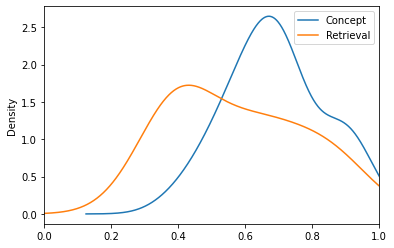

In [2]:
for condition in df_kb["Condition"].unique():
    df_kb[df_kb["Condition"] == condition]["PR.2"].plot.density(
        label=condition,
        legend=True,
        xlim=(0, 1)
    )

It seems like for the most part the participants who practiced producing a concept map as they read the assigned passage were more confident on taking a test a week after practicing their assigned learning methods, as evidenced by a higher volume of those students prediciting high scores on the test in comparison to the retrieval students.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

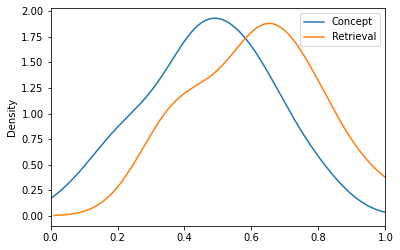

In [3]:
for condition in df_kb["Condition"].unique():
    df_kb[df_kb["Condition"] == condition]["TS.avg"].plot.density(
        label=condition,
        legend=True,
        xlim=(0, 1)
    )

After reading the codebook, I determined that the appropriate value to choose to gauge the students' success would be TS.avg as it is defined in the text as the average of the two scorers' scores, which I believe to be the most accurate statistic in regards to evaluating their actual performance on the follow up test. Looking at the density plot produced above, the graphic illustrates that concept learning students for the most part did not perform as well as retrieval students.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

-0.04

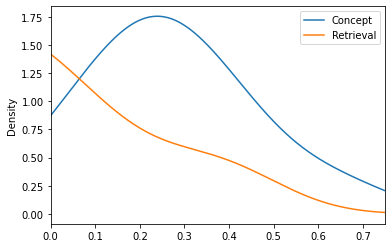

In [4]:
# the difference of the students prediction and the testing average grade received from two scorers
df_kb["Diff Pred"] = df_kb["PR.2"] - df_kb["TS.avg"]

for condition in df_kb["Condition"].unique():
    df_kb[df_kb["Condition"] == condition]["Diff Pred"].plot.density(
        label=condition,
        legend=True,
        xlim=(0, .75)
    )

df_concept = df_kb[df_kb["Condition"] == "Concept"]
df_retrieval = df_kb[df_kb["Condition"] == "Retrieval"]

df_concept["Diff Pred"].mean() # .22
df_retrieval["Diff Pred"].mean() # -.04

On average the concept map learning method students predicted .22 points higher than their actual result
On average the retrieval learning method students underestimated their learning, with the students predicting .04 points under their actual results.

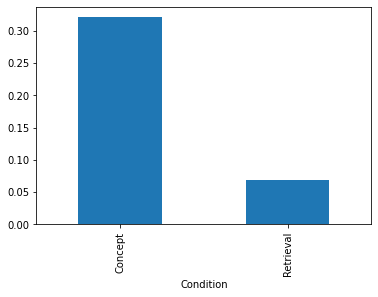

In [5]:
((df_kb.groupby("Condition").mean()["PR.2"] - df_kb.groupby("Condition").mean()["TS.avg"]) / df_kb.groupby("Condition").mean()["PR.2"]).abs().plot.bar()

The retrieval group's percent error is about 6% while the concept maps group's percent error is about 32%.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.